# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Question(s) for Analysis
In this project we will go through the medical appointments in Brazil dataset.We aim to understand some ofthe factors that may influence the showing up or not showing up of patients for a medical appointment. Some of the factors of interest are if being under a scholarship has a positive impact according to what we are analysing, does recieving an sms influence the showing up? Whether age or gender matters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
mydatacheck = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
mydata = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
mydata.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#number of rows and columns in mydata
mydata.shape

(110527, 14)

The columns PatientId and AppointmentID donot seem to be of much use in our analysis

In [5]:
mydata.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
mydata.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


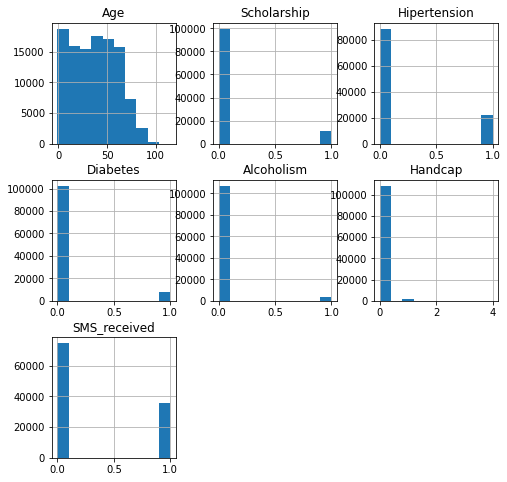

In [6]:
#Checking the distribution
mydata.hist(figsize = (8,8));

In [7]:
#Understanding statistical information about our data
mydata.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

Something queer is seen as we are analysing the statistical information of our data. There is a seen minimum age of -1 which is not normal. 
So first we drop the row with that data.
We check if there are any missing data or dupicates.

In [8]:
mydata.drop(mydata[mydata['Age']==-1].index, inplace=True)
mydata.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
mydata.isna().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#Checking for unique values as I also figure if there are duplicates which seems to be there
mydata.nunique()

Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#Seems there are duplicates in our dataset, let's explore more
mydata.duplicated().sum()

635

In [12]:
#I used this dataframe that has not been interefered with to check if the data had duplicates before.
mydatacheck.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned my data, I am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions posed in the Introduction section.

First we mask our no-show values

In [13]:
yes_show = mydata['No-show'] == 'No'
no_show = mydata['No-show'] == 'Yes'

In [14]:
#atleast to understand the number of people who showed up vs those who didn't.
#yes_show represents the people who showed up
yes_show.sum()

88207

In [15]:
# while no_show for those who did not.
no_show.sum()

22319

### Does the age count?

In [16]:
mydata.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<AxesSubplot:>

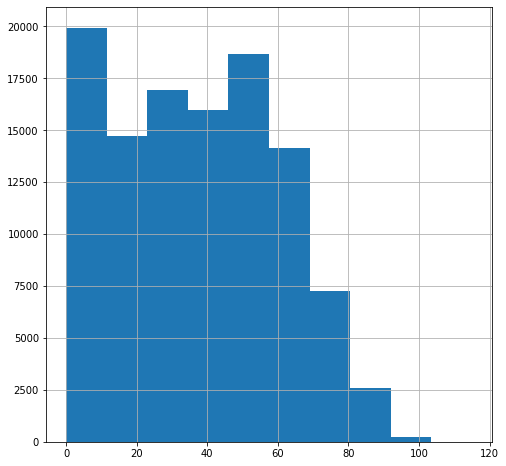

In [17]:
mydata['Age'].hist(figsize = (8,8))

The data is distributed to mostly those of young age, around the 50's too.

In [18]:
mydata.Age[yes_show].mean()

37.790504154999034

In [19]:
mydata.Age[no_show].mean()

34.31766656212196

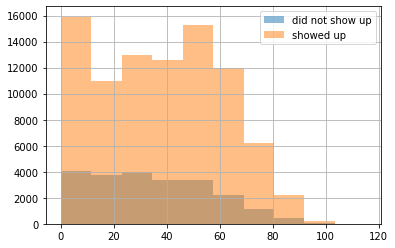

In [20]:
mydata.Age[no_show].hist(alpha=0.5,label = 'did not show up')
mydata.Age[yes_show].hist(alpha=0.5,label='showed up')
plt.legend();

Is it more likely for a female to show for appointments than male?

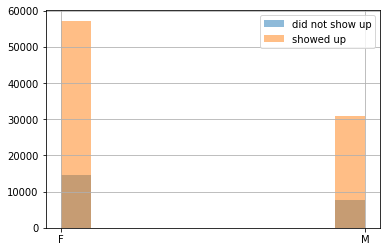

In [21]:
mydata.Gender[no_show].hist(alpha=0.5,label = 'did not show up')
mydata.Gender[yes_show].hist(alpha=0.5,label='showed up')
plt.legend();

### Is there by chance that recieving an sms influence the showing up ?

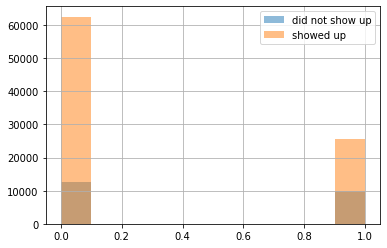

In [22]:
mydata.SMS_received[no_show].hist(alpha=0.5,label = 'did not show up')
mydata.SMS_received[yes_show].hist(alpha=0.5,label='showed up')
plt.legend();

### Are the people with scholarships commited to showing up for appointments?

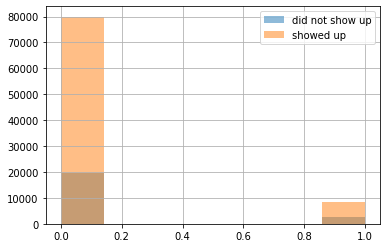

In [23]:
mydata.Scholarship[no_show].hist(alpha=0.5,bins = 7,label = 'did not show up')
mydata.Scholarship[yes_show].hist(alpha=0.5,bins = 7,label='showed up')
plt.legend();

<a id='conclusions'></a>
## Conclusions
According to my analysis I can conclude that;
<li>Scholarship attribute is not really that clear about how it  influences the showing up of a patient.</li>
<li>As for age the young ones have a high probability of showing up same to those of middle age  around the 50's</li>
<li>Recieving an SMS seems to be of importance as to if a patient will show up for appoitments.More analysis can be done on that. Maybe it may be effective to always send an sms to the patient as a reminder</li>
<li>Males have a poor tendency to show up for appointments as compared to women</li>

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1